# Analyse du Dataset Darija

Ce notebook a pour but d'analyser les données du dataset Darija-SFT-Mixture.

In [2]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration plus simple du style
sns.set_theme()  # Cela configurera automatiquement un style agréable

csv_path = Path("../data_Darija-SFT-Mixture/darija_data/csv_files")
csv_files = list(csv_path.glob("*.csv"))
print(f"Fichiers CSV trouvés : {[f.name for f in csv_files]}")

Fichiers CSV trouvés : ['train-00001-of-00002.csv', 'train-00000-of-00002.csv']


In [3]:
# Charger les fichiers CSV
dataframes = {}
total_rows = 0

for file in csv_files:
    df_name = file.stem
    df = pd.read_csv(file)
    dataframes[df_name] = df
    total_rows += len(df)
    
    print(f"\n=== {df_name} ===")
    print(f"Nombre de lignes : {len(df)}")
    print("Colonnes :", df.columns.tolist())
    print("\nAperçu des données :")
    display(df.head())

print(f"\nNombre total de lignes dans le dataset : {total_rows}")


=== train-00001-of-00002 ===
Nombre de lignes : 229142
Colonnes : ['dataset', 'id', 'messages', 'direction', 'metadata']

Aperçu des données :


,dataset,id,messages,direction,metadata
0,wizardlm,wizardlm_alpaca_14817,[{'content': 'واش تقدر تلقا لينا SQL query باش...,NaN,NaN
1,doda,doda_16234,[{'content': 'ترجم من الفصحى للدارجة:\nإذا بدأ...,msa_dr,NaN
2,ElecMorocco2016_few_shot,ElecMorocco2016_few_shot_3461,[{'content': 'شنو هو الإحساس ديال هاد الجملة؟\...,NaN,NaN
3,9esa,9esa_19,[{'content': 'كمل هاد لقصة:\nتصاوب فجلستوو و ن...,NaN,NaN
4,MSMMG,MSMMG_4237,[{'content': 'لخص هاد النص :\nكانت واحل ليك ال...,NaN,NaN



=== train-00000-of-00002 ===
Nombre de lignes : 229143
Colonnes : ['dataset', 'id', 'messages', 'direction', 'metadata']

Aperçu des données :


,dataset,id,messages,direction,metadata
0,doda,doda_34859,[{'content': 'ترجم من الدارجة للفصحى:\nماكايعج...,dr_msa,NaN
1,9esa,9esa_0,[{'content': 'كمل هاد لقصة:\nشراف كيشاف خيال د...,NaN,NaN
2,MArSum,MArSum_9965,[{'content': 'لخص هاد المقطع:\n تواصلَ إرتفاع...,NaN,NaN
3,doda,doda_30436,[{'content': 'ترجم من الفصحى للدارجة:\nإنه يزع...,msa_dr,NaN
4,MWQA,MWQA_3861,[{'content': 'هادا سؤال متعدد الخيارات (مع الج...,NaN,"{'page_id': 61648.0, 'page_title': 'جامع السود..."



Nombre total de lignes dans le dataset : 458285


In [4]:
for name, df in dataframes.items():
    print(f"\n=== Analyse statistique pour {name} ===\n")
    
    # Types de données
    print("Types de données :")
    display(df.dtypes)
    
    # Valeurs manquantes
    missing = df.isnull().sum()
    print("\nValeurs manquantes :")
    if missing.any():
        display(missing[missing > 0])
    else:
        print("Aucune valeur manquante")
    
    # Statistiques descriptives pour les colonnes numériques
    if df.select_dtypes(include=['int64', 'float64']).columns.any():
        print("\nStatistiques descriptives (colonnes numériques) :")
        display(df.describe())


=== Analyse statistique pour train-00001-of-00002 ===

Types de données :


dataset      object
id           object
messages     object
direction    object
metadata     object
dtype: object


Valeurs manquantes :


direction    177852
metadata     213901
dtype: int64


=== Analyse statistique pour train-00000-of-00002 ===

Types de données :


dataset      object
id           object
messages     object
direction    object
metadata     object
dtype: object


Valeurs manquantes :


direction    177851
metadata     213829
dtype: int64


=== Analyse textuelle pour train-00001-of-00002 ===



Analyse de la colonne : dataset

Statistiques de longueur :


count    229142.000000
mean          6.019429
std           3.453102
min           3.000000
25%           4.000000
50%           4.000000
75%           8.000000
max          27.000000
Name: dataset_length, dtype: float64

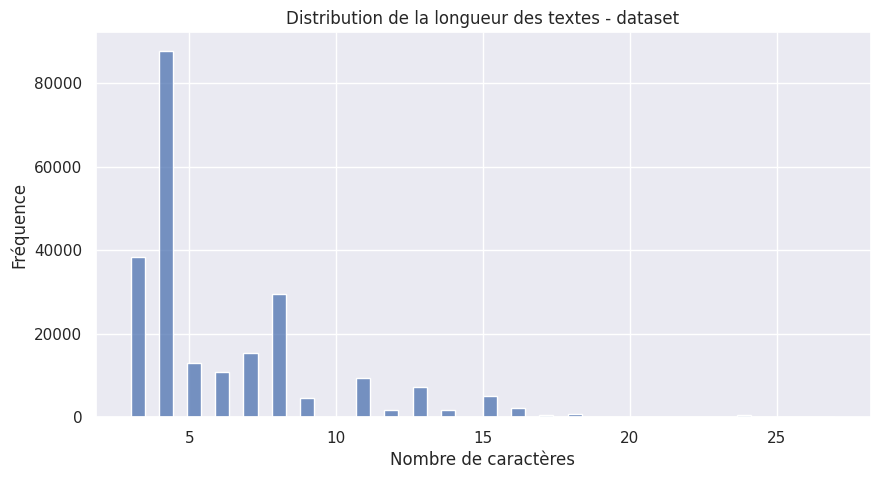


Analyse de la colonne : id

Statistiques de longueur :


count    229142.000000
mean         11.776505
std           4.378838
min           5.000000
25%           9.000000
50%          10.000000
75%          16.000000
max          33.000000
Name: id_length, dtype: float64

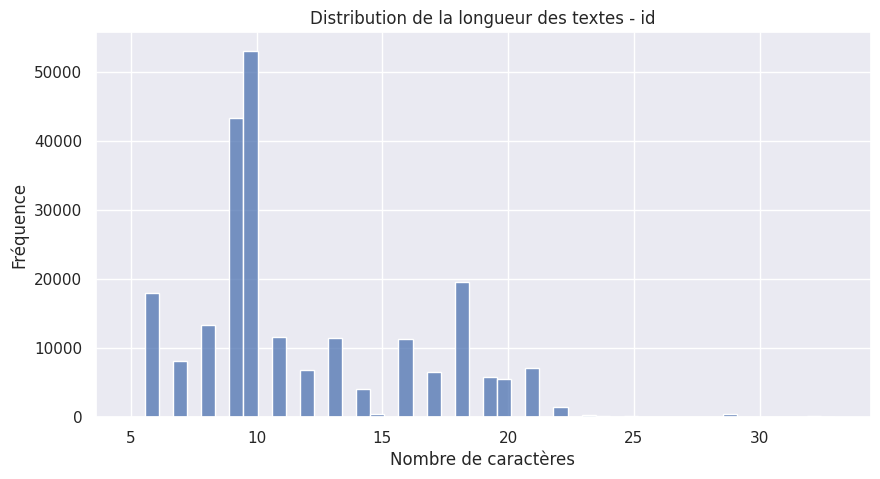


Analyse de la colonne : messages

Statistiques de longueur :


count    229142.000000
mean       1219.068163
std        1515.590535
min          81.000000
25%         204.000000
50%         461.000000
75%        1586.000000
max       21872.000000
Name: messages_length, dtype: float64

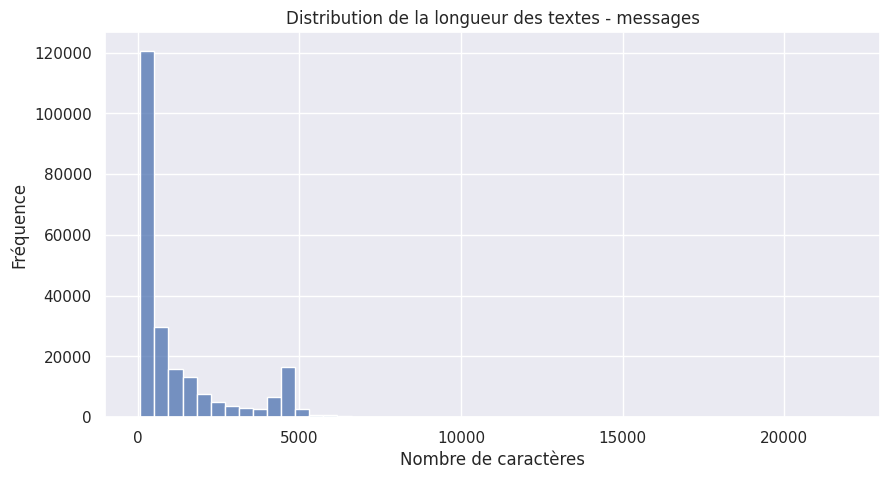


Analyse de la colonne : direction

Statistiques de longueur :


count    51290.000000
mean         5.367343
std          0.482086
min          5.000000
25%          5.000000
50%          5.000000
75%          6.000000
max          6.000000
Name: direction_length, dtype: float64

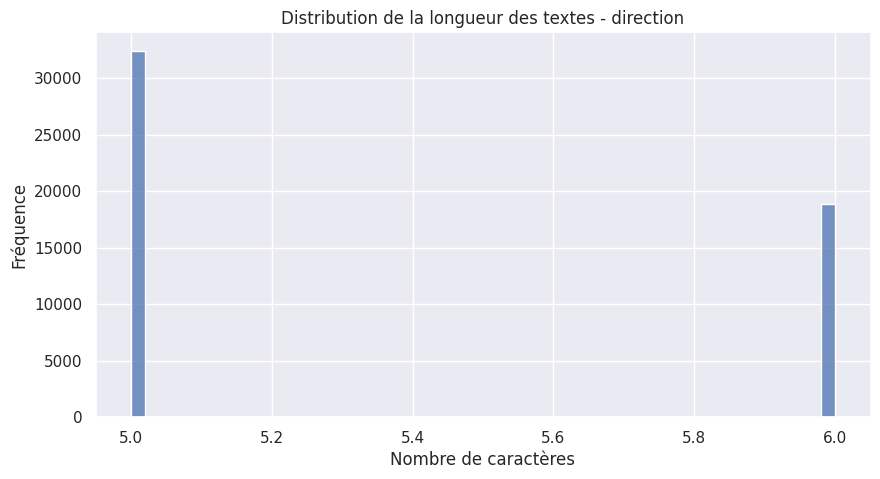


Analyse de la colonne : metadata

Statistiques de longueur :


count    15241.00000
mean        98.56991
std          7.82809
min         85.00000
25%         92.00000
50%         97.00000
75%        104.00000
max        157.00000
Name: metadata_length, dtype: float64

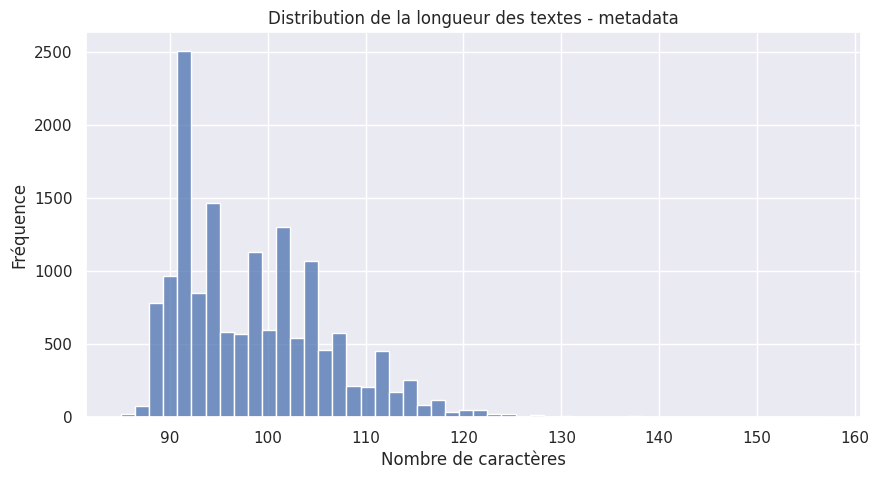


=== Analyse textuelle pour train-00000-of-00002 ===

Analyse de la colonne : dataset

Statistiques de longueur :


count    229143.000000
mean          6.017046
std           3.448423
min           3.000000
25%           4.000000
50%           4.000000
75%           8.000000
max          27.000000
Name: dataset_length, dtype: float64

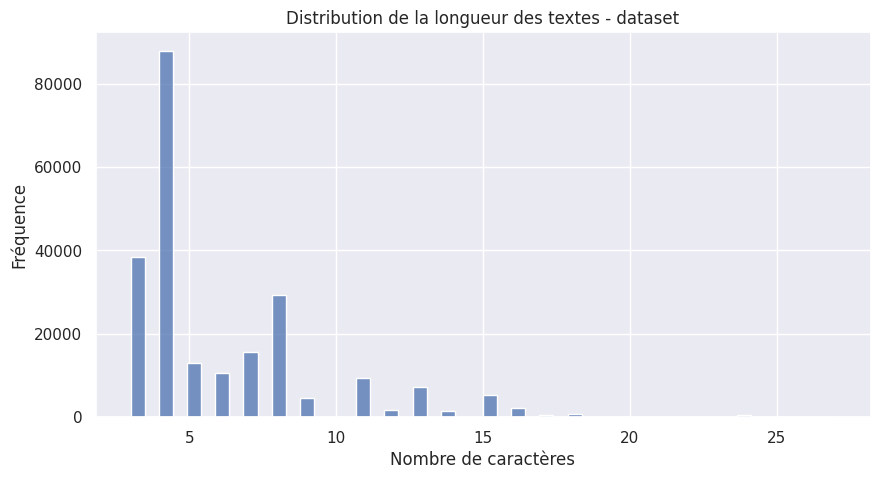


Analyse de la colonne : id

Statistiques de longueur :


count    229143.000000
mean         11.773530
std           4.371592
min           5.000000
25%           9.000000
50%          10.000000
75%          16.000000
max          33.000000
Name: id_length, dtype: float64

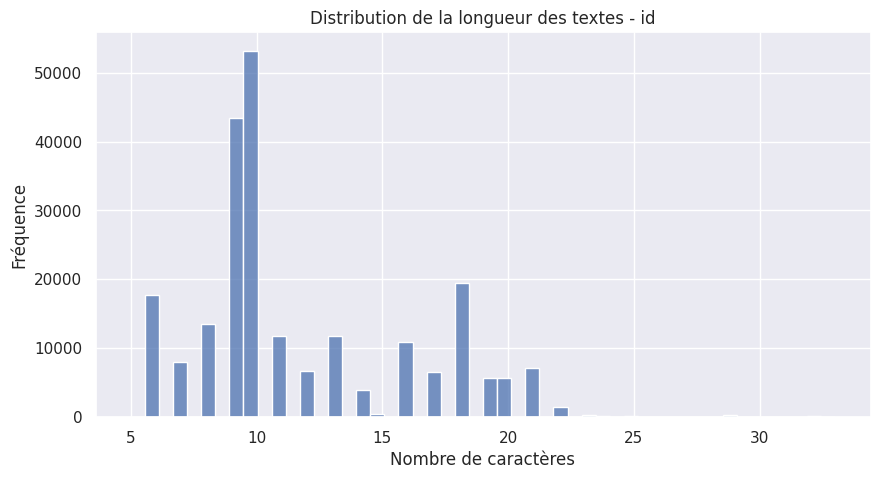


Analyse de la colonne : messages

Statistiques de longueur :


count    229143.000000
mean       1214.930563
std        1512.807513
min          91.000000
25%         203.000000
50%         457.000000
75%        1584.000000
max       18854.000000
Name: messages_length, dtype: float64

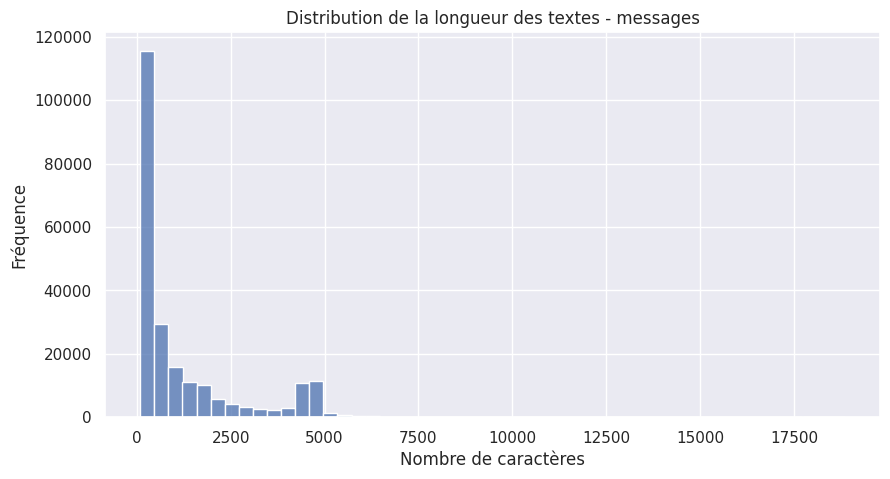


Analyse de la colonne : direction

Statistiques de longueur :


count    51292.000000
mean         5.365613
std          0.481606
min          5.000000
25%          5.000000
50%          5.000000
75%          6.000000
max          6.000000
Name: direction_length, dtype: float64

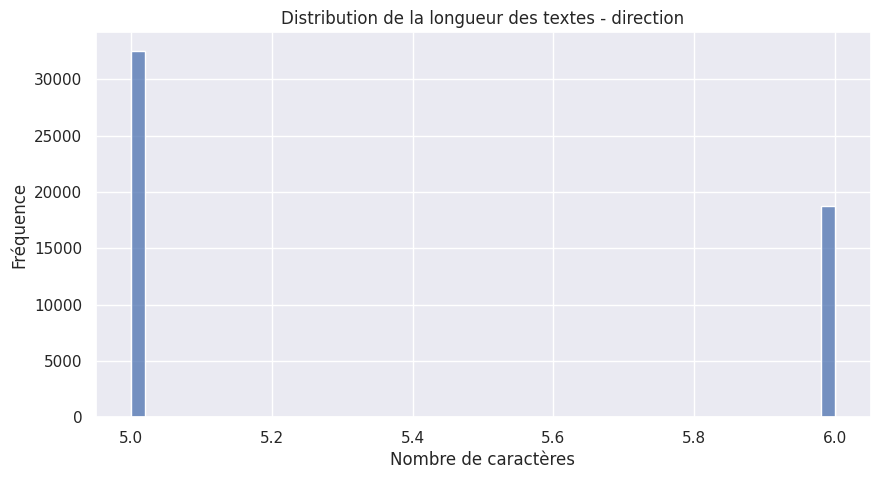


Analyse de la colonne : metadata

Statistiques de longueur :


count    15314.000000
mean        98.538984
std          7.922159
min         85.000000
25%         92.000000
50%         97.000000
75%        103.000000
max        145.000000
Name: metadata_length, dtype: float64

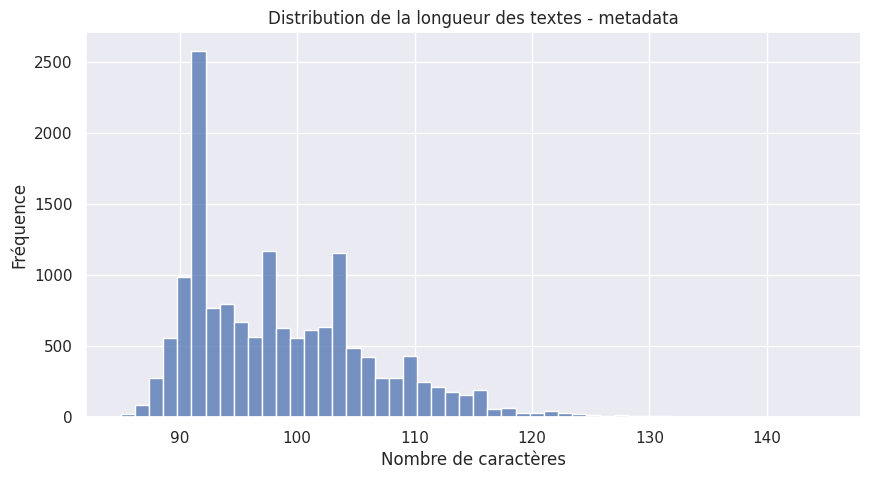

In [5]:
def analyze_text_column(df, column):
    # Longueur des textes
    df[f'{column}_length'] = df[column].str.len()
    
    print(f"\nAnalyse de la colonne : {column}")
    print("\nStatistiques de longueur :")
    display(df[f'{column}_length'].describe())
    
    # Distribution des longueurs
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=f'{column}_length', bins=50)
    plt.title(f'Distribution de la longueur des textes - {column}')
    plt.xlabel('Nombre de caractères')
    plt.ylabel('Fréquence')
    plt.show()

for name, df in dataframes.items():
    print(f"\n=== Analyse textuelle pour {name} ===")
    text_columns = df.select_dtypes(include=['object']).columns
    
    for col in text_columns:
        analyze_text_column(df, col)


=== Analyse de la direction dans train-00001-of-00002 ===

Distribution des directions :


direction
msa_dr    9439
dr_msa    9402
en_dr     7343
dr_en     7319
dr_fr     4700
fr_dr     4698
ar_dr     4197
dr_ar     4192
Name: count, dtype: int64


Pourcentage de valeurs manquantes : 77.62%


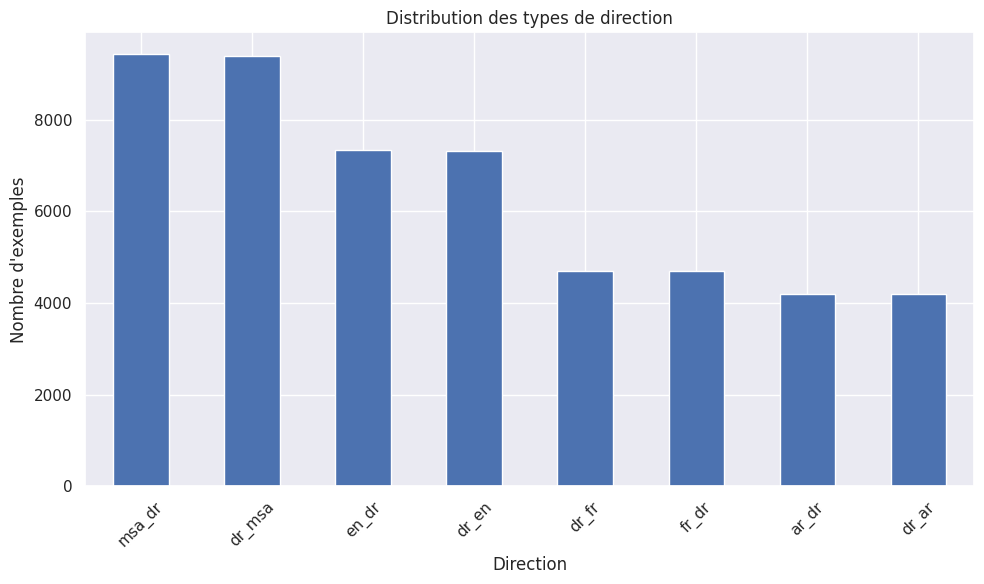


=== Analyse de la direction dans train-00000-of-00002 ===

Distribution des directions :


direction
dr_msa    9395
msa_dr    9358
dr_en     7318
en_dr     7294
fr_dr     4699
dr_fr     4697
dr_ar     4268
ar_dr     4263
Name: count, dtype: int64


Pourcentage de valeurs manquantes : 77.62%


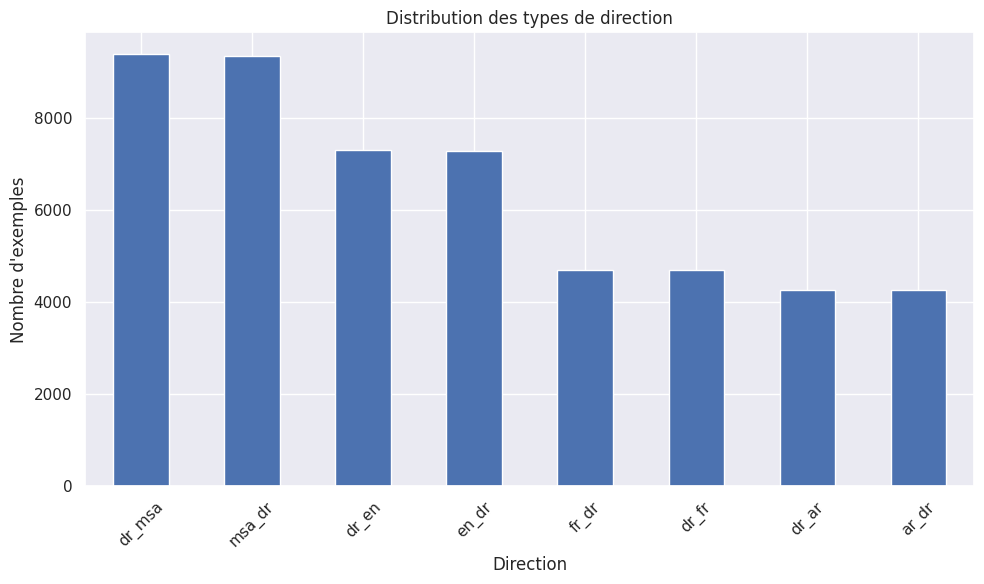

In [6]:
# Analyse de la colonne 'direction'
for name, df in dataframes.items():
    print(f"\n=== Analyse de la direction dans {name} ===")
    
    if 'direction' in df.columns:
        # Compter les valeurs uniques
        direction_counts = df['direction'].value_counts()
        print("\nDistribution des directions :")
        display(direction_counts)
        
        # Calculer le pourcentage de valeurs manquantes
        missing_pct = (df['direction'].isna().sum() / len(df)) * 100
        print(f"\nPourcentage de valeurs manquantes : {missing_pct:.2f}%")
        
        # Visualisation
        plt.figure(figsize=(10, 6))
        direction_counts.plot(kind='bar')
        plt.title('Distribution des types de direction')
        plt.xlabel('Direction')
        plt.ylabel('Nombre d\'exemples')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("La colonne 'direction' n'existe pas dans ce DataFrame")


=== Statistiques pour train-00001-of-00002 après filtrage ===
Nombre de lignes original : 229142
Nombre de lignes après filtrage : 24060

Distribution des directions :


direction
en_dr    7343
dr_en    7319
dr_fr    4700
fr_dr    4698
Name: count, dtype: int64

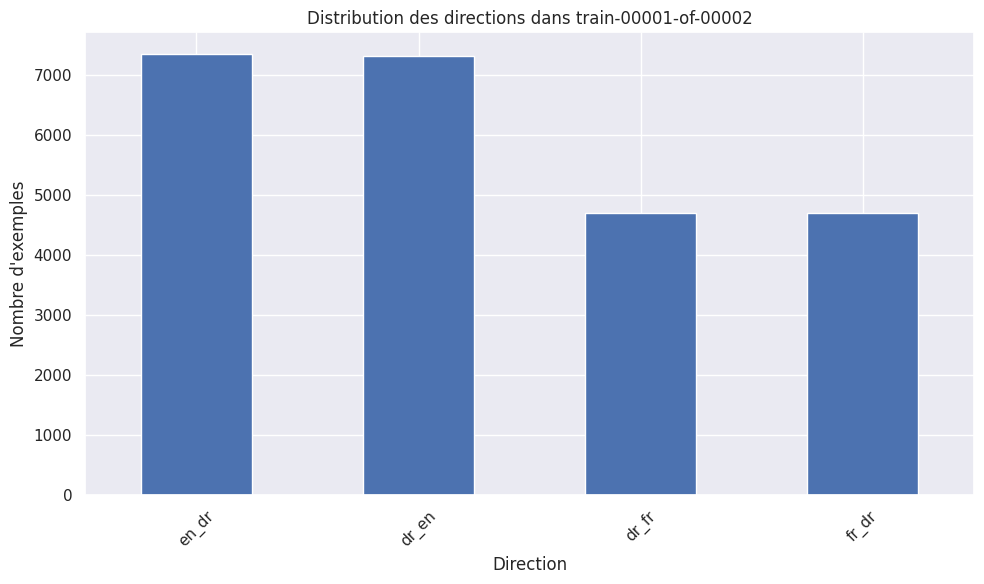


=== Statistiques pour train-00000-of-00002 après filtrage ===
Nombre de lignes original : 229143
Nombre de lignes après filtrage : 24008

Distribution des directions :


direction
dr_en    7318
en_dr    7294
fr_dr    4699
dr_fr    4697
Name: count, dtype: int64

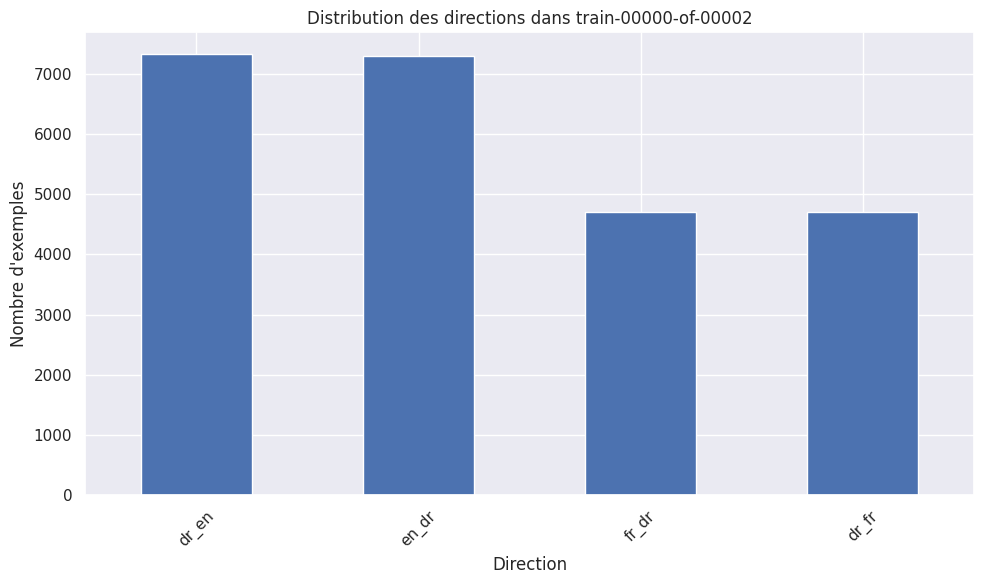


Nombre total d'exemples après filtrage : 48068


In [7]:
# Filtrer les directions souhaitées
directions_to_keep = ['dr_fr', 'fr_dr', 'en_dr', 'dr_en']

filtered_dataframes = {}
for name, df in dataframes.items():
    # Filtrer le DataFrame
    filtered_df = df[df['direction'].isin(directions_to_keep)]
    filtered_dataframes[name] = filtered_df
    
    print(f"\n=== Statistiques pour {name} après filtrage ===")
    print(f"Nombre de lignes original : {len(df)}")
    print(f"Nombre de lignes après filtrage : {len(filtered_df)}")
    
    # Afficher la distribution des directions
    direction_counts = filtered_df['direction'].value_counts()
    print("\nDistribution des directions :")
    display(direction_counts)
    
    # Visualisation
    plt.figure(figsize=(10, 6))
    direction_counts.plot(kind='bar')
    plt.title(f'Distribution des directions dans {name}')
    plt.xlabel('Direction')
    plt.ylabel('Nombre d\'exemples')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Remplacer les dataframes originaux par les versions filtrées
dataframes = filtered_dataframes

print("\nNombre total d'exemples après filtrage :", sum(len(df) for df in dataframes.values()))

=== Statistiques du DataFrame fusionné ===
Nombre total de lignes : 48068

Distribution des directions :


direction
en_dr    14637
dr_en    14637
fr_dr     9397
dr_fr     9397
Name: count, dtype: int64

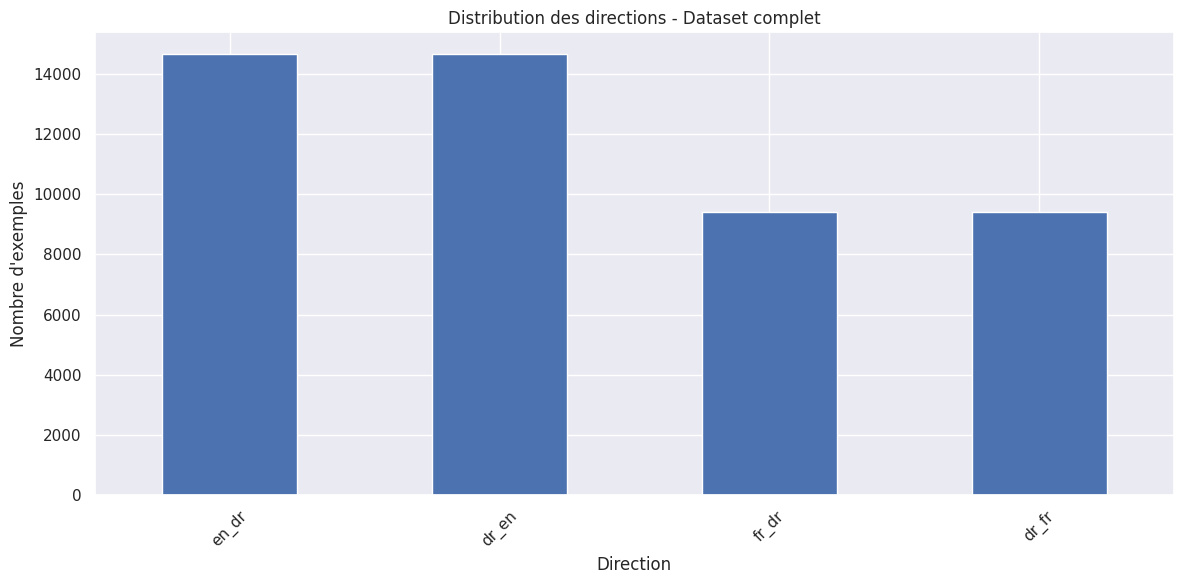


Aperçu du DataFrame fusionné :


,dataset,id,messages,direction,metadata,dataset_length,id_length,messages_length,direction_length,metadata_length
0,doda,doda_7382,[{'content': 'ترجم من الإنجليزية للدارجة:\nThe...,en_dr,NaN,4,9,172,5.0,NaN
1,doda,doda_30876,[{'content': 'ترجم من الفرنساوية للدارجة:\npre...,fr_dr,NaN,4,10,124,5.0,NaN
2,doda,doda_36205,[{'content': 'ترجم من الدارجة للفرنساوية:\nمات...,dr_fr,NaN,4,10,129,5.0,NaN
3,doda,doda_19635,[{'content': 'ترجم من الدارجة للإنجليزية:\nفاي...,dr_en,NaN,4,10,146,5.0,NaN
4,doda,doda_27343,[{'content': 'ترجم من الدارجة للفرنساوية:\nمشي...,dr_fr,NaN,4,10,155,5.0,NaN


Index(['messages', 'direction'], dtype='object')


In [12]:
# Fusionner les DataFrames filtrés
merged_df = pd.concat(list(dataframes.values()), axis=0, ignore_index=True)

print("=== Statistiques du DataFrame fusionné ===")
print(f"Nombre total de lignes : {len(merged_df)}")

# Afficher la distribution des directions dans le DataFrame fusionné
direction_counts = merged_df['direction'].value_counts()
print("\nDistribution des directions :")
display(direction_counts)

# Visualisation de la distribution finale
plt.figure(figsize=(12, 6))
direction_counts.plot(kind='bar')
plt.title('Distribution des directions - Dataset complet')
plt.xlabel('Direction')
plt.ylabel('Nombre d\'exemples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Remplacer les dataframes séparés par le DataFrame fusionné
dataframes = {'merged': merged_df}

# Afficher un aperçu du DataFrame fusionné
print("\nAperçu du DataFrame fusionné :")
display(merged_df.head())


#supprime des colonnes 
merged_df = merged_df.drop(columns=['id', 'dataset', 'metadata', 'dataset_length', 'id_length', 'messages_length', 'direction_length', 'metadata_length'])

#liste des colonnes du dataframe
print(merged_df.columns)

In [13]:
# Analyse du contenu de la colonne 'messages'
print("=== Analyse des messages ===")

# Afficher quelques exemples de messages par direction
for direction in merged_df['direction'].unique():
    print(f"\n=== Exemples de messages pour la direction {direction} ===")
    examples = merged_df[merged_df['direction'] == direction]['messages'].head(3)
    for i, msg in enumerate(examples, 1):
        print(f"\nExemple {i}:")
        print(msg)
        print("-" * 50)




=== Analyse des messages ===

=== Exemples de messages pour la direction en_dr ===

Exemple 1:
[{'content': 'ترجم من الإنجليزية للدارجة:\nThe accident happened at the intersection', 'role': 'user'}
 {'content': 'لكسيدا وقعات فين ملاقيين طروقان', 'role': 'assistant'}]
--------------------------------------------------

Exemple 2:
[{'content': 'ترجم من الإنجليزية للدارجة:\nNotably, although the first clones were frogs, no adult cloned frog has yet been produced from a somatic adult nucleus donor cell.', 'role': 'user'}
 {'content': 'وخاص يتقال بأنه وخا أن الحيوانات المستنسخة الأولى كانت ضفادع، إلا أنه مكانش حتى شي إنتاج ديل أي ضفدع بالغ مستنسخ من خلية جسدية مانحة ناضجة.', 'role': 'assistant'}]
--------------------------------------------------

Exemple 3:
[{'content': 'ترجم من الإنجليزية للدارجة:\nThe category of sets with functions as morphisms is the prototypical category.', 'role': 'user'}
 {'content': 'تيتعتابر النسق من الفئات اللي تيحتوي على دوال بحال المشاكلة ديالت النسق النموذجي.'

In [22]:
import pandas as pd
import json
import ast

# Initialisation
cleaned_count = 0
valid_data = []
invalid_data = []

# Dictionnaire direction → langues
direction_mapping = {
    "en_dr": ("en", "darija"),
    "fr_dr": ("fr", "darija"),
    "dr_fr": ("darija", "fr"),
    "dr_en": ("darija", "en")
}

# Fonction pour parser les messages
def parse_messages(messages):
    if isinstance(messages, list):
        return messages
    if isinstance(messages, str):
        try:
            messages = messages.replace("}\n {", "}, {")
            return ast.literal_eval(messages)
        except (ValueError, SyntaxError):
            return None
    return None

# Parcourir chaque ligne
for index, row in merged_df.iterrows():
    messages = parse_messages(row["messages"])
    direction = row["direction"]

    if not messages or len(messages) < 2 or len(messages) % 2 != 0:
        invalid_data.append({
            "index": index, "reason": "Invalid message format", "messages": row["messages"]
        })
        continue

    if direction not in direction_mapping:
        invalid_data.append({
            "index": index, "reason": "Unknown direction value", "direction": direction, "messages": messages
        })
        continue

    source_lang, target_lang = direction_mapping[direction]

    for i in range(0, len(messages), 2):
        user_message, assistant_message = messages[i], messages[i+1]

        if "content" not in user_message or "content" not in assistant_message:
            invalid_data.append({
                "index": index, "reason": "Missing 'content'", "messages": [user_message, assistant_message]
            })
            continue

        content = user_message["content"].strip()

        # 🟡 Cas spécial: consigne courte ("ترجم:" suivi directement de la phrase)
        if content.startswith("ترجم:"):
            original_text = content.replace("ترجم:", "").strip()
        else:
            content_parts = content.split("\n")
            if len(content_parts) <= 1:
                invalid_data.append({
                    "index": index, "reason": "Missing actual text to translate", "messages": [user_message, assistant_message]
                })
                continue
            original_text = content_parts[1].strip()

        translation_text = assistant_message["content"].strip()

        entry = {"input": {source_lang: original_text, target_lang: translation_text}}
        valid_data.append(entry)
        cleaned_count += 1

# Sauvegarde
with open("cleaned_translations.json", "w", encoding="utf-8") as file:
    json.dump({"translations": valid_data}, file, ensure_ascii=False, indent=4)

with open("invalid_translations.json", "w", encoding="utf-8") as file:
    json.dump(invalid_data, file, ensure_ascii=False, indent=4)

# Rapport final
print(f"✅ Nettoyage terminé ! {cleaned_count} entrées nettoyées et conservées.")
print(f"⚠️ {len(invalid_data)} entrées bruitées détectées et enregistrées dans 'invalid_translations.json'.")

# Aperçu rapide des erreurs (optionnel)
if invalid_data:
    print("\n🔎 Exemples d'erreurs détectées :")
    for error in invalid_data[:5]:
        print(f"- Index {error['index']} : {error['reason']}")
        print(f"  Messages : {error['messages']}\n")


✅ Nettoyage terminé ! 51136 entrées nettoyées et conservées.
⚠️ 0 entrées bruitées détectées et enregistrées dans 'invalid_translations.json'.


In [2]:
"""
Ce script charge un fichier JSON non structuré de traductions et produit un fichier structuré clair avec des champs explicites pour les langues sources et cibles.

Args:
    input_file (str): Chemin vers le fichier JSON original à lire.
    output_file (str): Chemin vers le fichier JSON structuré à générer.

Exemple:
    Input JSON:
    {
        "translations": [
            {"input": {"en": "Hello", "darija": "سلام"}}
        ]
    }

    Output JSON:
    {
        "translations": [
            {
                "source_lang": "en",
                "source": "Hello",
                "target_lang": "darija",
                "target": "سلام"
            }
        ]
    }
"""

import json

# Charger le fichier JSON initial
with open('cleaned_translations.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

structured_translations = []

# Parcourir chaque entrée et structurer les données
for item in data['translations']:
    for input in [item['input']]:
        languages = list(input.keys())
        if len(languages) == 2:
            source_lang, target_lang = languages
            structured_translations.append({
                'source_lang': languages[0],
                'source': input[languages[0]],
                'target_lang': languages[1],
                'target': input[languages[1]]
            })

# Sauvegarder les nouvelles données structurées
with open('structured_translations.json', 'w', encoding='utf-8') as file:
    json.dump({'translations': structured_translations}, file, ensure_ascii=False, indent=2)
